# Plotting percentatge of river or sea incidents acted by the fire departement

In [63]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Importing correlated incidents with fire departement actions

In [64]:
direct = 'csv_files/'

df = pd.read_csv(direct + 'Correlations_riversea.csv')
df['CODI_COMARCA'] = df['CODI_COMARCA'].astype(str).str.zfill(2)
df

,ANY-MES,COMARCA,INCIDENTS,CODI_COMARCA,SALVAMENTS
0,2018-01-01,ALT EMPORDA,720,02,1
1,2018-01-01,ALT URGELL,89,04,1
2,2018-01-01,BAIX EMPORDA,546,10,1
3,2018-01-01,BAIX LLOBREGAT,4057,11,1
4,2018-01-01,MARESME,2147,21,1
...,...,...,...,...,...
489,2022-11-01,SELVA,941,34,1
490,2022-12-01,ALT EMPORDA,880,02,2
491,2022-12-01,BAGES,1121,07,1
492,2022-12-01,BAIX CAMP,1481,08,1


In [65]:
def percentatge(x,y):
    p = x/y*100
    return p

data=df.copy()

data['PERCENTATGE'] = data.apply(lambda row: percentatge(row['SALVAMENTS'], row['INCIDENTS']), axis=1)

data

# results= data[data['COMARCA']=='BERGUEDA']
# results

,ANY-MES,COMARCA,INCIDENTS,CODI_COMARCA,SALVAMENTS,PERCENTATGE
0,2018-01-01,ALT EMPORDA,720,02,1,0.138889
1,2018-01-01,ALT URGELL,89,04,1,1.123596
2,2018-01-01,BAIX EMPORDA,546,10,1,0.183150
3,2018-01-01,BAIX LLOBREGAT,4057,11,1,0.024649
4,2018-01-01,MARESME,2147,21,1,0.046577
...,...,...,...,...,...,...
489,2022-11-01,SELVA,941,34,1,0.106270
490,2022-12-01,ALT EMPORDA,880,02,2,0.227273
491,2022-12-01,BAGES,1121,07,1,0.089206
492,2022-12-01,BAIX CAMP,1481,08,1,0.067522


In [66]:
aver_perc = data.copy()

aver_perc = pd.DataFrame(aver_perc.groupby(['COMARCA','CODI_COMARCA'])['PERCENTATGE'].apply(np.mean))

aver_perc= aver_perc.reset_index()

new_df = pd.DataFrame({'CODI_COMARCA':[str(32),str(42)],
                       'COMARCA':['SEGARRA','MOIANES'],
                       'PERCENTATGE':[0,0]})
aver_perc2=pd.concat([aver_perc,new_df],ignore_index=True)

aver_perc2[aver_perc2['CODI_COMARCA']=="42"]



,COMARCA,CODI_COMARCA,PERCENTATGE
41,MOIANES,42,0.0


## Importing map

In [67]:
data_dir= '../dades/'
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'COMARCA'}, inplace = True)
cat.rename(columns = {'CODICOMAR':'CODI_COMARCA'}, inplace = True)
cat.head()

cat[cat['CODI_COMARCA']=='42']

,CODI_COMARCA,COMARCA,CAPCOMAR,AREAC5000,geometry
41,42,Moianès,Moià,337.2896,"POLYGON ((428837.859 4639478.022, 428961.755 4..."


## Merging map and data and plotting

In [68]:
data_merged =pd.merge(cat, aver_perc2, on=['CODI_COMARCA'])
data_merged.head()

data_merged[data_merged['CODI_COMARCA']=="42"]

,CODI_COMARCA,COMARCA_x,CAPCOMAR,AREAC5000,geometry,COMARCA_y,PERCENTATGE
41,42,Moianès,Moià,337.2896,"POLYGON ((428837.859 4639478.022, 428961.755 4...",MOIANES,0.0


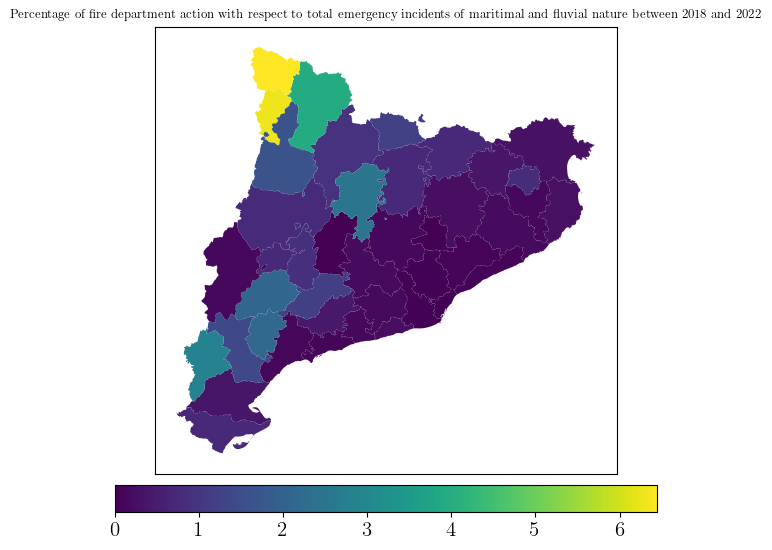

In [69]:
#highlight the counties with most rescue actions
# colors = {"Baix Llobregat":'darkorange',
#           "Vallès Occidental":'cornflowerblue',
#           "Val d'Aran":'mediumorchid',
#           "Ripollès":'royalblue',
#           "Berguedà":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.set_xticks([])
ax.set_yticks([])
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
data_merged.plot(column = 'PERCENTATGE',
                                  ax=ax,
                                  legend=True,
                                  cmap='viridis',
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})
merged_rescue_tot_gpd = data_merged.set_index("COMARCA_x")
#merged_rescue_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()))
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15)
ax.set_title(r'Percentage of fire department action with respect to total emergency incidents of maritimal and fluvial nature between 2018 and 2022', fontsize = 9)
plt.savefig('figures/fire_over_incident_riversea.pdf')
plt.show()